# Analysis of Q2 on the Maven Dependency Dataset (MDD)

This document is the second chapter of a set of notebooks that accompany the paper "Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central". In this chapter, we investigate Q2 and its corresponding null hypothesis on the Maven Dependency Dataset (MDD).

**Q2**: To what extent has the adherence to semantic versioning principles increased
over time?

**H$_2$**: The adherence to semantic versioning principles has increased over time.

**Note**: To have access to the Exploratory Data Analysis of the dataset, please refer to the notebook Q1-MDD.

---

## Table of Contents
<div class="toc" style="margin-top: 1em;">
    <ul class="toc-item">
        <li>
            <span><a href="#Setup" data-toc-modified-id="Setup">Setup</a></span>
        </li>
        <li>
            <span><a href="#Dataset" data-toc-modified-id="Dataset">Dataset</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset">Load Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Clean-Dataset" data-toc-modified-id="Clean-Dataset">Clean Dataset</a></span>
                </li>
                <li>
                    <span><a href="#Finalize-Dataset" data-toc-modified-id="Finalize-Dataset">Finalize Dataset</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#Dataset-Summary" data-toc-modified-id="Dataset-Summary">Dataset Summary</a></span>
        </li>
        <li>
            <span><a href="#Results" data-toc-modified-id="Results">Results</a></span>
            <ul class="toc-item">
                <li>
                    <span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation">Data Preparation</a></span>
                </li>
                <li>
                    <span><a href="#Histograms" data-toc-modified-id="Histograms">Histograms</a></span>
                </li>
                <li>
                    <span><a href="#Line-Plot" data-toc-modified-id="Line-Plot">Line Plot</a></span>
                </li>
            </ul>
        </li>
        <li>
            <span><a href="#EOF" data-toc-modified-id="EOF">EOF</a></span>
        </li>
    </ul>
</div>

---

## Setup

In [1]:
# Import required libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(ggthemes)

# Set theme
theme_set(theme_stata())

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Warning message:
“package ‘tidyverse’ was built under R version 3.5.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

Warning message:
“package ‘tidyr’ was built under R version 3.5.2”
Warning message:
“package ‘purrr’ was built under R version 3.5.2”
Warning message:
“package ‘stringr’ was built under R version 3.5.2”
Warning message:
“package ‘forcats’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘ggthemes’ was built under R version 3.5.2”


---

## Dataset

### Load Dataset

First, we load the `deltas-raemaekers.csv` dataset which contains information about breaking changes computed by Maracas on the selected upgrades of the MDD.

In [2]:
deltas <- read.csv("../code/cypher-queries/data/gen/deltas-raemaekers.csv", stringsAsFactors=FALSE, colClasses=c("level"="factor", "year"="factor", "java_version_v1"="factor", "java_version_v2"="factor", "expected_level"="factor"))
sprintf("Successfully loaded %d deltas", nrow(deltas))
head(deltas)

[1] "Successfully loaded 13193 deltas"

,group,artifact,v1,v2,level,language,year,age_diff,distance,clients,⋯,fieldLessAccessible_unstableAnnon,fieldMoreAccessible_unstableAnnon,constructorRemoved_unstableAnnon,constructorLessAccessible_unstableAnnon,unstableAnnons,jar_v1,jar_v2,delta,exception,t
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,org.apache.jackrabbit,jackrabbit-text-extractors,1.6.0,1.6.1,PATCH,unknown,2010,1,8,1,⋯,-1,-1,-1,-1,{},-1,-1,-1,jar-not-found,2
2,org.apache.jackrabbit,jackrabbit-text-extractors,1.5.0,1.6.0,MINOR,unknown,2009,1,30,4,⋯,-1,-1,-1,-1,{},-1,-1,-1,jar-not-found,2
3,org.apache.struts,struts2-rest-plugin,2.2.1,2.2.3,PATCH,java,2011,22,2,4,⋯,0,0,0,0,{},/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/apache/struts/struts2-rest-plugin/2.2.1/struts2-rest-plugin-2.2.1.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/apache/struts/struts2-rest-plugin/2.2.3/struts2-rest-plugin-2.2.3.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.apache.struts/struts2-rest-plugin/2.2.1_to_2.2.3.delta,-1,3
4,org.springframework.security,spring-security-core-tiger,2.0.1,2.0.2,PATCH,java,2008,2,1,30,⋯,0,0,0,0,{},/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.1/spring-security-core-tiger-2.0.1.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.2/spring-security-core-tiger-2.0.2.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.springframework.security/spring-security-core-tiger/2.0.1_to_2.0.2.delta,-1,0
5,org.springframework.security,spring-security-core-tiger,2.0.2,2.0.3,PATCH,java,2008,19,1,3,⋯,0,0,0,0,{},/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.2/spring-security-core-tiger-2.0.2.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.3/spring-security-core-tiger-2.0.3.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.springframework.security/spring-security-core-tiger/2.0.2_to_2.0.3.delta,-1,0
6,org.springframework.security,spring-security-core-tiger,2.0.3,2.0.4,PATCH,java,2008,8,1,66,⋯,0,0,0,0,{},/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.3/spring-security-core-tiger-2.0.3.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/local-repo/org/springframework/security/spring-security-core-tiger/2.0.4/spring-security-core-tiger-2.0.4.jar,/home/dig/repositories/maven-api-dataset/code/cypher-queries/data/gen/deltas/org.springframework.security/spring-security-core-tiger/2.0.3_to_2.0.4.delta,-1,0


### Clean Dataset

Here, we clean the dataset to discard the upgrades and deltas not complying with our requirements.

In [3]:
# What issues did we encounter when attempting to compute the deltas? (Java version >= 8, JAR not produced from Java code, JAR not found on Maven Central, etc.)
table(deltas$exception)


                  -1     exception-raised invalid-java-version 
               11751                    2                  641 
    invalid-language        jar-not-found 
                 493                  306 

In [4]:
# Which languages did we find?
table(deltas$language)


clojure  groovy    java   scala unknown 
      2      71   12345      76     699 

In [5]:
# Discard all deltas that raised an exception
deltas <- subset(deltas, exception == -1)

# Discard all deltas for upgrades that do not contain any code
sprintf("%d deltas correspond to JARs not containing any code", nrow(subset(deltas, declarations_v1 == 0 & declarations_v2 == 0)))
deltas <- subset(deltas, declarations_v1 > 0 | declarations_v2 > 0)

# Discard all deltas where v1 was released _after_ v2
sprintf("%d where v1 was released after v2", nrow(subset(deltas, age_diff < 0)))
deltas <- subset(deltas, age_diff >= 0)

sprintf("%d remaining deltas after cleaning", nrow(deltas))

[1] "0 deltas correspond to JARs not containing any code"

[1] "309 where v1 was released after v2"

[1] "11442 remaining deltas after cleaning"

In [6]:
# Remove cases where dates are used as versions (e.g. 20081010.0.1, 1.20081010.1, 1.0.20081010)
deltas <- deltas[grep("^[0-9]{0,7}[.][0-9]{0,7}([.][0-9]{0,7})?$", deltas$v1),]
deltas <- deltas[grep("^[0-9]{0,7}[.][0-9]{0,7}([.][0-9]{0,7})?$", deltas$v2),]

deltas <- deltas[!grepl("^2[0-9]{3}[.][0-9]{2}([.][0-9]{2})?$", deltas$v1),]
deltas <- deltas[!grepl("^[0-9]{2}[.][0-9]{2}[.]2[0-9]{3}$", deltas$v1),]
deltas <- deltas[!grepl("^[0-9]{2}[.]2[0-9]{3}$", deltas$v1),]

deltas <- deltas[!grepl("^2[0-9]{3}[.][0-9]{2}([.][0-9]{2})?$", deltas$v2),]
deltas <- deltas[!grepl("^[0-9]{2}[.][0-9]{2}[.]2[0-9]{3}$", deltas$v2),]
deltas <- deltas[!grepl("^[0-9]{2}[.]2[0-9]{3}$", deltas$v2),]

sprintf("%d deltas remaining after removing the ones with dates as versions", nrow(deltas))

[1] "11411 deltas remaining after removing the ones with dates as versions"

In [7]:
# Keep only pairs released before 2012 to match the original study's corpus
deltas <- subset(deltas, as.numeric(as.character(year)) <= 2011)
sprintf("%d deltas remaining after removing the ones with release date >= 2012", nrow(deltas))

[1] "11384 deltas remaining after removing the ones with release date >= 2012"

### Finalize Dataset
Here, we incorporate additional derived information into the dataset.

In [8]:
# Add column with all BCs excluding the ones related to: 
# - annotationDeprecatedAdded: not a BC
# - methodAddedToPublicClass: not a BC
# - classNowCheckedException: not binary incompatible
# - methodNowThrowsCheckedException: not binary incompatible
# - fieldStaticAndOverridesStatic: lack of alignment with JLS
# - superclassModifiedIncompatible: lack of alignment with JLS
# - methodIsStaticAndOverridesNotStatic: lack of alignment with JLS
# - methodAbstractAddedInSuperclass: covered by other BC
# - methodAbstractAddedInImplementedInterface: covered by other BC
# - methodLessAccessibleThanInSuperclass: covered by other BC
# - fieldLessAccessibleThanInSuperclass: covered by other BC
# - fieldRemovedInSuperclass: covered by other BC
# - methodRemovedInSuperclass: covered by other BC

deltas$bcs_clean = deltas$bcs -
    deltas$annotationDeprecatedAdded -
    deltas$methodAddedToPublicClass - 
    deltas$classNowCheckedException - 
    deltas$methodNowThrowsCheckedException -
    deltas$fieldStaticAndOverridesStatic -
    deltas$superclassModifiedIncompatible - 
    deltas$methodIsStaticAndOverridesNotStatic -
    deltas$methodAbstractAddedInSuperclass -
    deltas$methodAbstractAddedInImplementedInterface -
    deltas$methodLessAccessibleThanInSuperclass - 
    deltas$fieldLessAccessibleThanInSuperclass -
    deltas$fieldRemovedInSuperclass -
    deltas$methodRemovedInSuperclass

# Same thing for the stable part of the API
deltas$bcs_clean_stable = deltas$bcs_stable -
    deltas$annotationDeprecatedAdded_stable -
    deltas$methodAddedToPublicClass_stable - 
    deltas$classNowCheckedException_stable - 
    deltas$methodNowThrowsCheckedException_stable -
    deltas$fieldStaticAndOverridesStatic_stable -
    deltas$superclassModifiedIncompatible_stable - 
    deltas$methodIsStaticAndOverridesNotStatic_stable -
    deltas$methodAbstractAddedInSuperclass_stable -
    deltas$methodAbstractAddedInImplementedInterface_stable -
    deltas$methodLessAccessibleThanInSuperclass_stable - 
    deltas$fieldLessAccessibleThanInSuperclass_stable -
    deltas$fieldRemovedInSuperclass_stable -
    deltas$methodRemovedInSuperclass_stable

In [9]:
# Add columns with BCs ratios (i.e. BCs / V1 declarations)
deltas$bcs_ratio_clean = deltas$bcs_clean / deltas$declarations_v1
deltas$bcs_ratio_clean_stable = deltas$bcs_clean_stable / deltas$declarations_v1

In [10]:
# Assign the 'DEV' semver level to versions of the form 0.x.x
levels(deltas$level) <- c(levels(deltas$level), "DEV")
deltas[grepl("^0[.]", deltas$v1),]$level = "DEV"

---

## Dataset Summary

In [11]:
sprintf("Final size of the dataset: %s deltas", nrow(deltas))
summary(deltas)

[1] "Final size of the dataset: 11384 deltas"

    group             artifact              v1                 v2           
 Length:11384       Length:11384       Length:11384       Length:11384      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   level        language              year         age_diff    
 MAJOR: 253   Length:11384       2010   :3500   Min.   : 0.00  
 MINOR:2413   Class :character   2011   :2895   1st Qu.: 6.00  
 PATCH:7728   Mode  :character   2009   :2378   Median :14.00  
 DEV  : 990                      2008   :1481   Mean   :14.02  
                                 2007   : 623   3rd Qu.:22.00  


---

## Results

### Data Preparation

In [12]:
# Get all years
years <- sort(unique(deltas$year))
years

[1] 2005 2006 2007 2008 2009 2010 2011
Levels: 2004 2005 2006 2007 2008 2009 2010 2011 2012 2015 2016

In [13]:
# Computes the percentage of breaking upgrades per semver level
perc_breaking_upgrades <- function(ds, dat, semver_level) {
    dt <- subset(ds, level == semver_level)
    
    for (y in years) {
        dt_current <- subset(dt, year == y)
        val <- 0.0
        
        if (nrow(dt_current) != 0) {
            val <- nrow(subset(dt_current, bcs_clean_stable > 0)) / nrow(dt_current)
        }
        dat <- rbind(dat, data.frame(year=y, level=semver_level, breaking=val))
    }
    
    return (dat)
}

In [14]:
# Computing percentage of breaking upgrades per semver level per year
breaking_upgrades <- data.frame(
    year=character(),
    level=character(),
    breaking=double()
)

breaking_upgrades <- perc_breaking_upgrades(deltas, breaking_upgrades, "MAJOR")
breaking_upgrades <- perc_breaking_upgrades(deltas, breaking_upgrades, "MINOR")
breaking_upgrades <- perc_breaking_upgrades(deltas, breaking_upgrades, "PATCH")
breaking_upgrades <- perc_breaking_upgrades(deltas, breaking_upgrades, "DEV")

# Extend results with non-major cases
dt2 <- deltas
dt2$level <- as.character(dt2$level)
dt2[dt2$level == "MINOR" || dt2$level == "PATCH",]$level = "NONMAJOR"

breaking_upgrades <- perc_breaking_upgrades(dt2, breaking_upgrades, "NONMAJOR")

breaking_upgrades

year,level,breaking
<fct>,<fct>,<dbl>
2005,MAJOR,0.9333333
2006,MAJOR,0.8000000
2007,MAJOR,0.8888889
2008,MAJOR,0.7894737
2009,MAJOR,0.8461538
2010,MAJOR,0.7682927
2011,MAJOR,0.5542169
2005,MINOR,0.8510638
2006,MINOR,0.6896552


### Histograms

In [15]:
# Creates a histogram of breaking releases per year given a semver level
plot_bar_semver <- function(semver_level, level_label) {
    dt <- subset(breaking_upgrades, level == semver_level)
    plot <- ggplot(dt, aes(x=year, y=breaking)) + 
        labs(title=sprintf("Ratio of %s Breaking Upgrades per Year", level_label),
             x="Release year",
             y="Ratio of breaking upgrades") +
        geom_bar(stat="identity")
    
    return (plot)
}

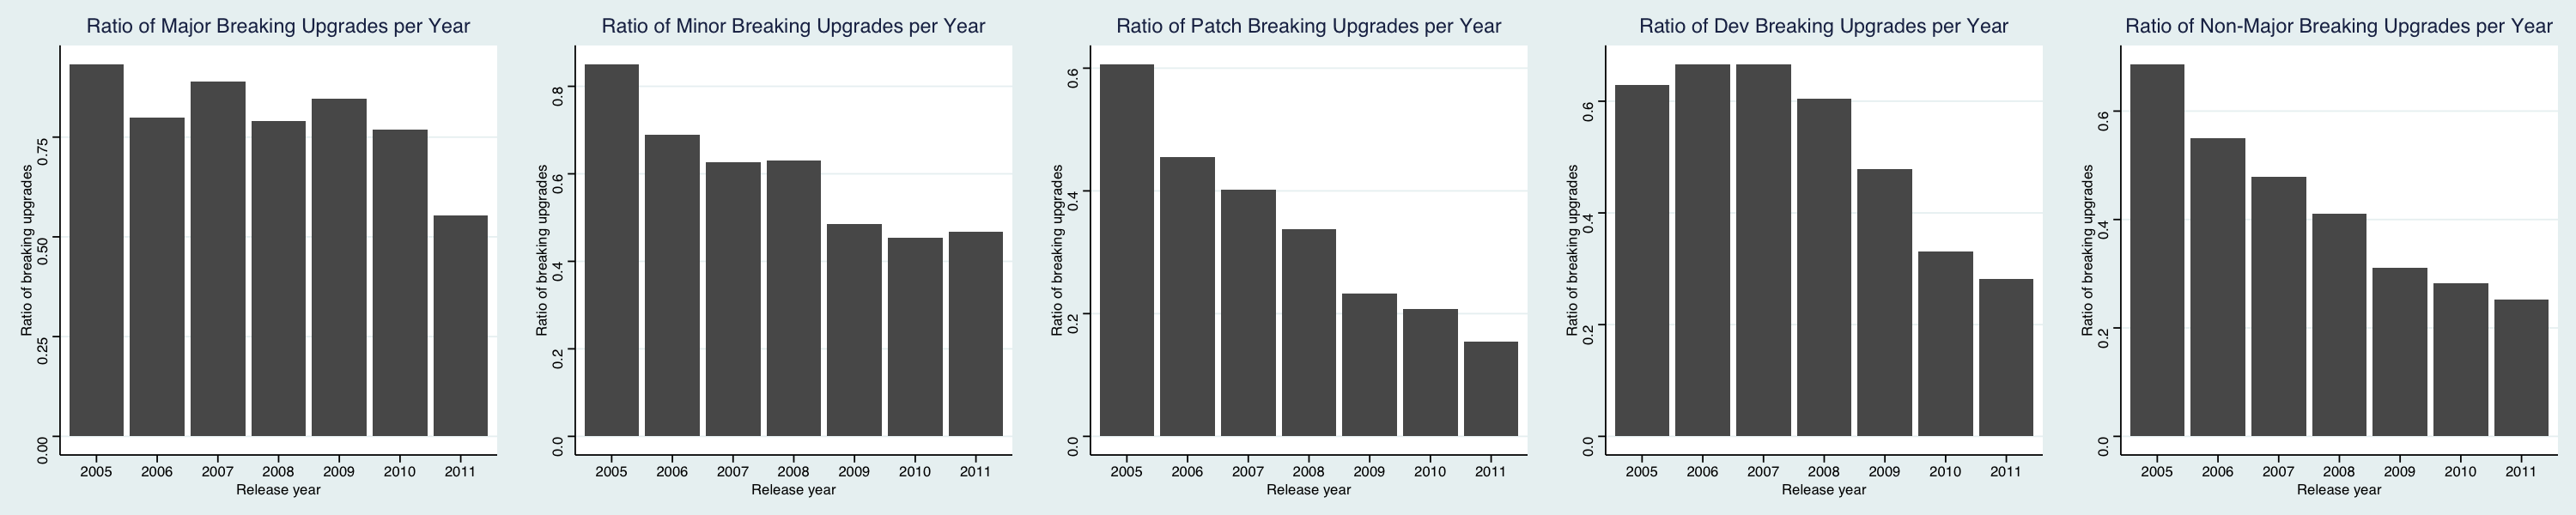

In [16]:
# Create histograms of the percentage of breaking upgrades per semver level
options(repr.plot.width=25, repr.plot.height=5)
bar_major <- plot_bar_semver("MAJOR", "Major")
bar_minor <- plot_bar_semver("MINOR", "Minor") 
bar_patch <- plot_bar_semver("PATCH", "Patch") 
bar_devs <- plot_bar_semver("DEV", "Dev")
bar_nonmajor <- plot_bar_semver("NONMAJOR", "Non-Major")
grid.arrange(bar_major, bar_minor, bar_patch, bar_devs, bar_nonmajor, ncol=5, nrow=1)

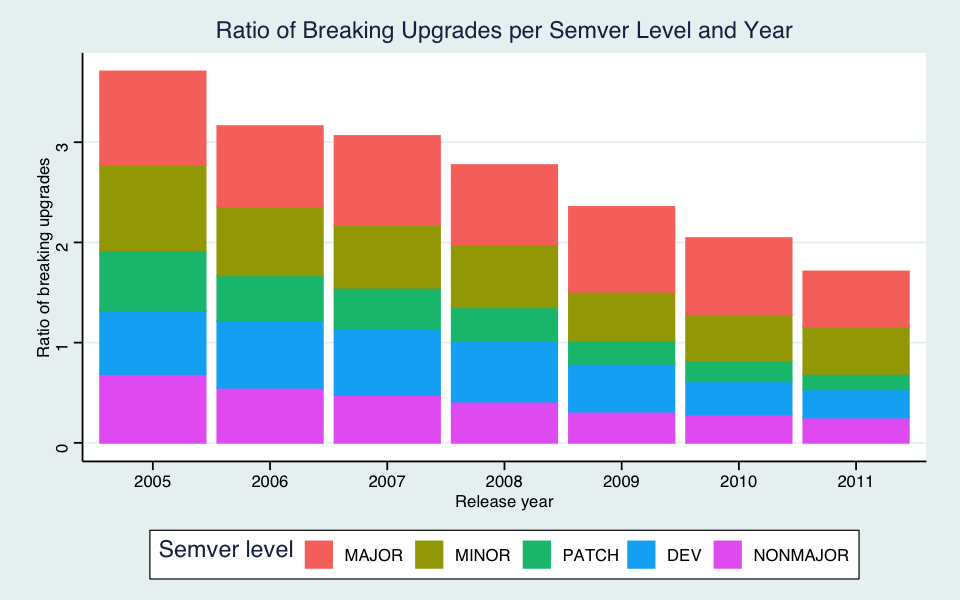

In [17]:
# A stacked view of the percentage of breaking upgrades per year per semver level
options(repr.plot.width=8, repr.plot.height=5)
ggplot(breaking_upgrades, aes(x=year, y=breaking, color=level, fill=level)) + 
        labs(title="Ratio of Breaking Upgrades per Semver Level and Year",
             x="Release year",
             y="Ratio of breaking upgrades",
             fill="Semver level", 
             color="Semver level") +
        geom_bar(stat="identity")

### Line Plot

Evolution of the ratio of breaking upgrades per semver level in MDD. Each data point aggregates the number of breaking upgrades of the given type for an entire year.

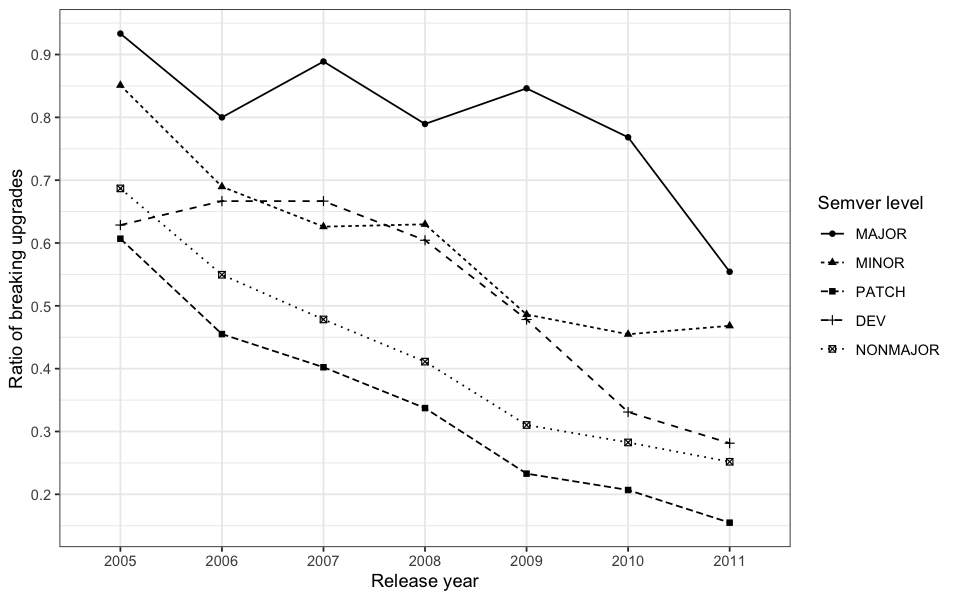

In [18]:
# Create line plot with the percentage of breaking upgrades per semver level per year
p <- ggplot(breaking_upgrades, aes(x=year, y=breaking, group=level)) + 
        geom_line(aes(linetype=level), stat="identity", size=0.5) +
        labs(x="Release year",
             y="Ratio of breaking upgrades",
             shape ="Semver level", 
             linetype="Semver level") +
        scale_y_continuous(breaks=seq(0,1,0.1)) +
        geom_point(aes(shape=level)) +
        theme_bw()

p
ggsave("figures/mdd-semver-year.pdf", p,
       width=11, height=7)

---

## EOF

> Lina Ochoa, Thomas Degueule, Jean-Rémy Falleri & Jurgen Vinju. Breaking Bad? Semantic Versioning and Impact of Breaking Changes in Maven Central. Journal of Empirical Software Engineering, 2021.

This notebook—and all its content—is licensed under the [MIT License](https://choosealicense.com/licenses/mit/).   
© 2021 Maracas